Predicting the Google Stock price for the month of Jan 2017 based on the information gathered from the previous 5 years.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [35]:
df_train.shape

(1258, 6)

In [3]:
training_set = df_train.iloc[:, 1:2].values

In [4]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

## PART 1: Data Preprocessing

In [5]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [7]:
# Creating a data structure with 60 timeseps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
  X_train.append(training_set_scaled[i - 60:i, 0])
  y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [9]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [10]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

## PART 2: Building the RNN

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [13]:
# Initializing the RNN
regressor = Sequential()

In [14]:
# First LSTM layer and Dropout Regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [15]:
# Second LSTM layer and Dropout Regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [16]:
# Third LSTM layer and Dropout Regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
# Fourth LSTM layer and Dropout Regularization
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [18]:
# Adding the Output Layer
regressor.add(Dense(units = 1))

In [19]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
# Fitting the RNN to the Training Set
regressor.fit(x = X_train, y = y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0357
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0057
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0060
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0062
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0048
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0045
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0045
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0048
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0041
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0045
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0049
Epoch 12/100
1198/1198 [==============================] - 5s 4ms/step - lo

## PART 3: Predictions and Visualization

In [21]:
# Getting the real stock price of 2017
df_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = df_test.iloc[:, 1:2].values

In [22]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [24]:
# Getting the predicted stock price of 2017
df_total = pd.concat((df_train['Open'], df_test['Open']), axis = 0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
  X_test.append(inputs[i - 60:i, 0])

X_test = np.array(X_test)
# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [25]:
predicted_stock_price

array([[791.9676 ],
       [788.8904 ],
       [788.89374],
       [790.5605 ],
       [794.2468 ],
       [800.4482 ],
       [806.2498 ],
       [808.6495 ],
       [808.75287],
       [808.2629 ],
       [808.064  ],
       [808.06836],
       [808.1013 ],
       [808.6502 ],
       [809.5384 ],
       [814.0199 ],
       [821.2478 ],
       [829.1754 ],
       [833.54254],
       [829.1847 ]], dtype=float32)

### Visualizing the results

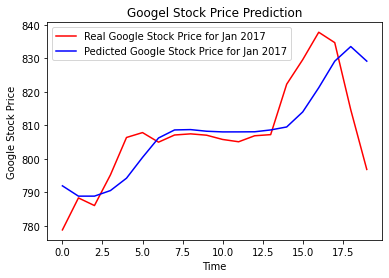

In [27]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price for Jan 2017')
plt.plot(predicted_stock_price, color = 'blue', label = 'Pedicted Google Stock Price for Jan 2017')
plt.title('Googel Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In the parts of the predictions containing some spikes, our model cannot react to fast, non-linear changes. But for the parts with the smooth changes, the model reacts robustly. 

In [28]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

11.275304749731317

## PART 4: Improving the RNN model

1. Getting more train data: Training the model on the past 10 years data.  
2. Increasing the no.of timesteps to 120 (6 months).  
3. Adding more LSTM layers to 6.
4. Adding more neurons in the LSTM layers.

In [29]:
df_train_ten = pd.read_csv('Google_Stock_Price_Train_10_years.csv')

In [30]:
df_train_ten.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-21,290.630646,292.314331,285.056549,290.401489,290.401489,12662600
1,2010-01-22,281.196014,284.234619,266.431335,273.978058,273.978058,13651700
2,2010-01-25,272.274445,273.913300,266.755127,268.991760,268.991760,8872800
3,2010-01-26,267.980530,273.773834,267.143677,270.197235,270.197235,8743600
4,2010-01-27,269.624390,272.802460,266.655518,270.037842,270.037842,7958400


In [32]:
df_train_ten.shape

(2607, 7)

In [31]:
df_test_ten = pd.read_csv('Google_Stock_Price_Test_10_years.csv')
df_test_ten.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-01,1418.390015,1437.959961,1418.000000,1431.819946,1431.819946,1217100
1,2020-06-02,1430.550049,1439.609985,1418.829956,1439.219971,1439.219971,1278100
2,2020-06-03,1438.300049,1446.552002,1429.776978,1436.380005,1436.380005,1256200
3,2020-06-04,1430.400024,1438.959961,1404.729980,1412.180054,1412.180054,1484300
4,2020-06-05,1413.170044,1445.050049,1406.000000,1438.390015,1438.390015,1734900


In [33]:
df_test_ten.shape

(15, 7)

In [34]:
training_set = df_train_ten.iloc[:, 1:2].values

# Normalization
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [36]:
# Creating a data structure with 60 timeseps and 1 output
X_train = []
y_train = []
for i in range(120, 2607):
  X_train.append(training_set_scaled[i - 120:i, 0])
  y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [37]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [38]:
X_train.shape

(2487, 120, 1)

In [40]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

### Building RNN model

In [41]:
model = Sequential()
# First LSTM layer and Dropout Regularization 
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Second LSTM layer and Dropout Regularization
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))
# Third LSTM layer and Dropout Regularization
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))
# Fourth LSTM layer and Dropout Regularization
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))
# Fifth LSTM layer and Dropout Regularization
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))
# Sixth LSTM layer and Dropout Regularization
model.add(LSTM(units = 100))
model.add(Dropout(0.2))
# Adding the Output Layer
model.add(Dense(units = 1))

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 120, 100)          40800     
_________________________________________________________________
dropout_5 (Dropout)          (None, 120, 100)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 120, 100)          80400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 120, 100)          0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 120, 100)          80400     
_________________________________________________________________
dropout_7 (Dropout)          (None, 120, 100)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 120, 100)         

In [43]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training Set
model.fit(x = X_train, y = y_train, epochs = 100, batch_size = 32)

Epoch 1/100
2487/2487 [==============================] - 57s 23ms/step - loss: 0.0126
Epoch 2/100
2487/2487 [==============================] - 53s 21ms/step - loss: 0.0027
Epoch 3/100
2487/2487 [==============================] - 54s 22ms/step - loss: 0.0029
Epoch 4/100
2487/2487 [==============================] - 53s 21ms/step - loss: 0.0030
Epoch 5/100
2487/2487 [==============================] - 53s 21ms/step - loss: 0.0022
Epoch 6/100
2487/2487 [==============================] - 53s 21ms/step - loss: 0.0021
Epoch 7/100
2487/2487 [==============================] - 52s 21ms/step - loss: 0.0021
Epoch 8/100
2487/2487 [==============================] - 55s 22ms/step - loss: 0.0018
Epoch 9/100
2487/2487 [==============================] - 54s 22ms/step - loss: 0.0017
Epoch 10/100
2487/2487 [==============================] - 52s 21ms/step - loss: 0.0017
Epoch 11/100
2487/2487 [==============================] - 52s 21ms/step - loss: 0.0016
Epoch 12/100
2487/2487 [============================

In [44]:
real_stock_price = df_test_ten.iloc[:, 1:2].values

In [46]:
# Getting the predicted stock price of 2017
df_total = pd.concat((df_train_ten['Open'], df_test_ten['Open']), axis = 0)
inputs = df_total[len(df_total) - len(df_test_ten) - 120:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(120, 135):
  X_test.append(inputs[i - 120:i, 0])

X_test = np.array(X_test)
# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[1408.2291],
       [1411.7571],
       [1418.219 ],
       [1423.8491],
       [1425.3796],
       [1422.4128],
       [1423.7494],
       [1429.9884],
       [1436.6609],
       [1436.3088],
       [1433.1605],
       [1421.3164],
       [1429.267 ],
       [1431.659 ],
       [1433.7603]], dtype=float32)

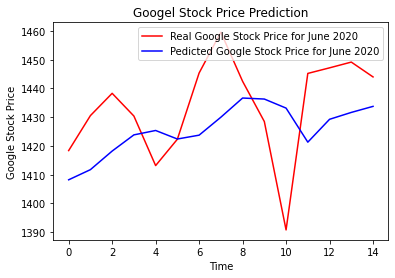

In [47]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price for June 2020')
plt.plot(predicted_stock_price, color = 'blue', label = 'Pedicted Google Stock Price for June 2020')
plt.title('Googel Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [48]:
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

19.294323301156265